<IPython.core.display.Javascript object>


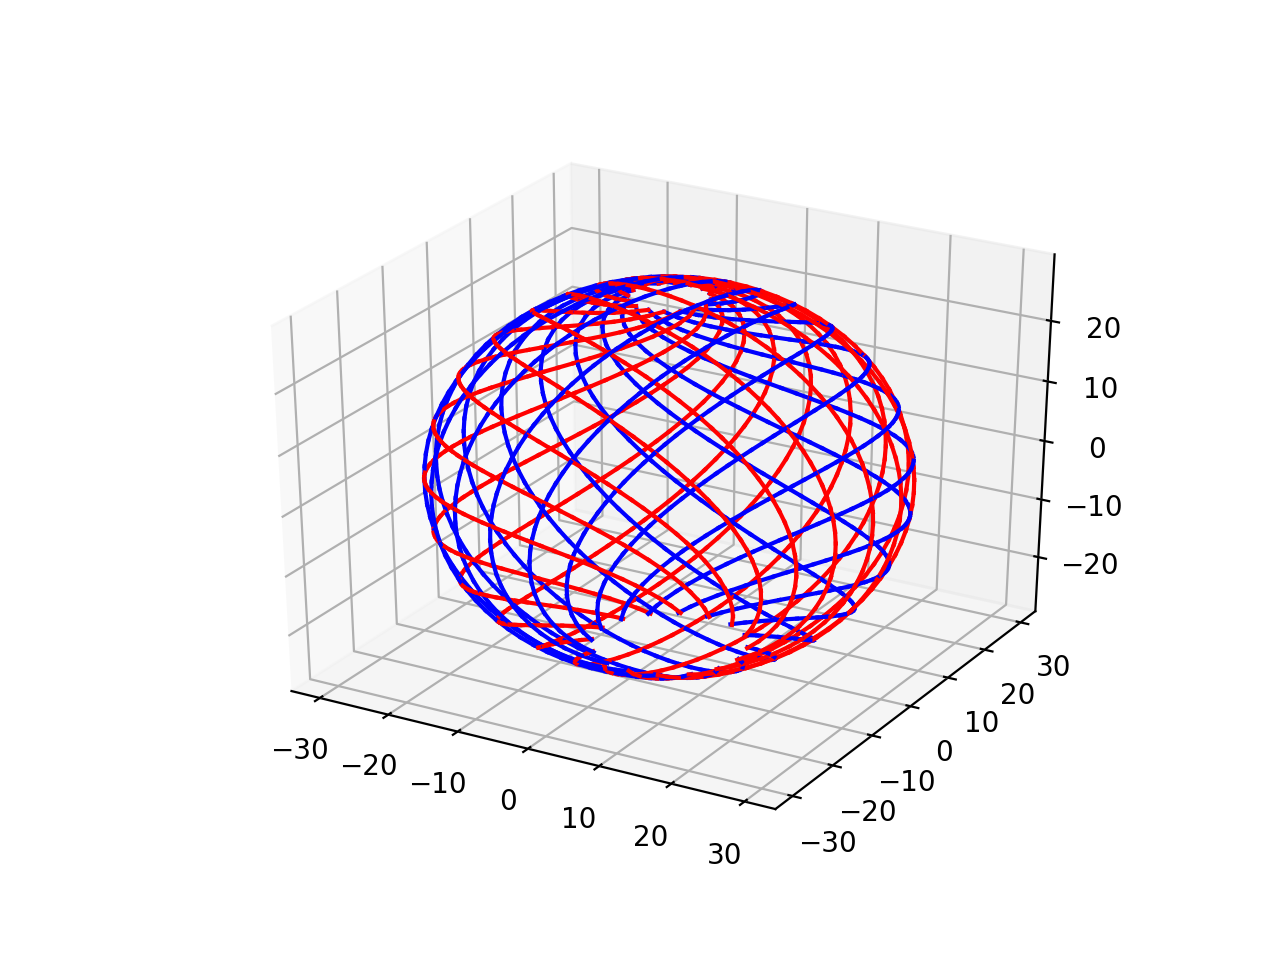

In [14]:
from math import pi
import numpy as np
import xarray as xr
# %matplotlib inline
%matplotlib notebook
import matplotlib.pyplot as plt
import math 
from numpy import linalg as LA
from mpl_toolkits.mplot3d import axes3d, Axes3D
def michell_3d_sphere(r,r1,r2,alpha):
    #step 1 Domain
    #r, r1, r2 = 30, 10, 15                      #radius of sphere, torque 1 and torque 2
    step = 2                                    # step in absolute value
    #alpha = pi/32                               #Radial distribution of starting points on
    #step 2 Loads
    m = np.array([
        [0,0,0],
        [0,0,1],
        [0,1,0]
    ])                                          #strain tensor
    #step 3 Generation of the form
    c1 = np.array([np.sqrt(r**2-r1**2), 0, 0])  #Position of Torque 1 center
    c2 = np.array([np.sqrt(r**2-r2**2), 0, pi]) #Position of Torque 2 center

    #Starting points definition on Torque 1
    starting_points = [] #  n x 3
    long = 2*pi/alpha

    for i in 1 + np.arange(long):
        a = 2 * pi * i / long
        node = np.array([r,a,math.acos(c1[0]/r)])
        starting_points.append(node)
    starting_points = np.array(starting_points)

    # angles = np.arange(long) * 2 * pi / long # (n,)
    # rs = np.ones(long) * r

    #startings_point = []
    #for i in range(int(long)):
    #    node = (r, a, math.acos(c1[0]/r))
    #     node = {
    #         'r': r,
    #         'a': a,
    #         'angle': math.acos(c1[0]/r)
    #     }
    #   startings_point.append(node)

    # node = starting_point[i]
    # node[0]
    # node['r']

    #Calculate eigenvectors and eigenvalues
    d, v = LA.eig(m)
    v = v[:, d != 0]
    d = d[d != 0]
    lambda_M = d[0]
    lambda_m = d[-1]
    pi_M = v[:, 0] * np.sign(v[-1, 0])
    pi_m = v[:, -1] * np.sign(v[-1, -1])

    def sph2cart(azimuth,elevation,r):
        x = r * np.cos(elevation) * np.cos(azimuth)
        y = r * np.cos(elevation) * np.sin(azimuth)
        z = r * np.sin(elevation)
        return x, y, z

    def cart2sph(x,y,z):
        x2_y2 = x**2 + y**2
        r = np.sqrt(x2_y2 + z**2)                    # r
        elev = math.atan2(z,np.sqrt(x2_y2))          # theta
        az = math.atan2(y,x)                         # phi
        return r, elev, az

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # length = len(starting_points)
    next_starting_points = []

    # for i in range(length):
    #     x0 = starting_points[i,:].copy()
    #     x0_M = [x0[0] + step * pi_M[0], x0[1] + step * pi_M[1]/(x0[0] * math.sin(x0[2])), x0[2] + step * pi_M[2]/x0[0]]
    #     x0_m = [x0[0] + step * pi_m[0], x0[1] + step * pi_m[1]/(x0[0] * math.sin(x0[2])), x0[2] + step * pi_m[2]/x0[0]]
    #     next_starting_points.append([x0_M ,x0_m])
    #     x0[0], x0[1], x0[2] = sph2cart(x0[1], pi/2-x0[2], x0[0]);
    #     x0_M[0], x0_M[1], x0_M[2] = sph2cart(x0_M[1], pi/2 - x0_M[2], x0_M[0]);
    #     x0_m[0], x0_m[1], x0_m[2] = sph2cart(x0_m[1], pi/2 - x0_m[2], x0_m[0]);
    #     ax.plot(
    #         [x0[0], x0_M[0]],
    #         [x0[1], x0_M[1]],
    #         zs = [x0[2], x0_M[2]],
    #         color = 'blue')
    #     ax.plot(
    #         [x0[0], x0_m[0]],
    #         [x0[1], x0_m[1]],
    #         zs = [x0[2], x0_m[2]], 
    #         color = 'red')

    #First iteration
    for r, a, angle in starting_points:
        x, y, z = sph2cart(a, pi/2-angle, r)
        for (pi_r, pi_a, pi_angle), color in (pi_M, 'blue'), (pi_m, 'red'):
            mr, ma, mangle = m_sphere = [r + step * pi_r, 
                                         a + step * pi_a/(r * math.sin(angle)), 
                                         angle + step * pi_angle/r] 
            mx, my, mz = sph2cart(ma, pi/2 - mangle, mr)
            ax.plot(
                [x, mx],
                [y, my],
                zs = [z, mz], 
                color = color)
            next_starting_points.append(m_sphere)
    #next_starting_points = np.array(next_starting_points)



    #plt.show()
    #print(np.array(next_starting_points).shape)

    # Next Iterations
    #while max(next_starting_points[:,2]) < (pi-math.acos(C2[0]/r)):
    #            starting_points = next_starting_points            
    #            length = len(Starting_points[:,0])
    #            next_starting_points = []
    #            x0 = Starting_points(:,i)
    #                if mod(i,2) == 0:
    #                    x0_M = [x0[0] + step * pi_M[0],
    #                            x0[1] + step * pi_M[1]/(x0[0] * sin(x0[2])),
    #                            x0[2] + step * pi_M[2]/x0[0]]
    #                    next_starting_points = [next_starting_points, x0_M]
    #                    x0[0], x0[1], x0[2] = sph2cart(x0[1], pi/2 - x0[2], x0[0])
    #                    x0_M[0],x0_M[1],x0_M[2] = sph2cart(x0_M[1], pi/2-x0_M[2], x0_M[0])
    #                    plot3([x0[0] x0_M[0]],[x0[1] x0_M[1]],[x0[2] x0_M[2]],'b')

    #            else:
    #                    x0_m = [x0[0] + step * pi_m[0], 
    #                            x0[1] + step * pi_m[1] / (x0[0] * sin(x0[2])), 
    #                            x0[2] + step * pi_m[2] / x0[0]]
    #                    next_starting_points = [next_starting_points,x0_m]
    #                    x0[0], x0[1], x0[2] = sph2cart(x0[1], pi/2 - x0[2], x0[0])
    #                    x0_m[0],x0_m[1],x0_m[2] = sph2cart(x0_m[1], pi/2 - x0_m[2], x0_m[0])
    #                    plot3([x0[0] x0_m[0]],[x0[1] x0_m[1]], [x0[2] x0_m[2]],'r')

    #axis equal axis off axis([-1.01*R 1.01*R,-1.01*R 1.01*R,-1.01*R 1.01*R])


    #def plot_next_iterations(r, a, angle):
    #    mr, ma, mangle = m_sphere = [r + step * pi_r, 
    #                                 a + step * pi_a/(r * math.sin(angle)), 
    #                                 angle + step * pi_angle/r] 
    #    mx, my, mz = sph2cart(ma, pi/2 - mangle, mr)
    #    return mx, my, mz, m_sphere
    #   ax.plot(
    #    [x, mx],
    #    [y, my],
    #    zs = [z, mz], 
    #    color = linecolor)
    #    next_starting_points.append(m_sphere)

    # Next Iterations

    while max(np.array(next_starting_points)[:,2]) < (pi-math.acos(c2[0]/r)):
            starting_points = next_starting_points
            next_starting_points = []

            for r, a, angle in starting_points:
                x, y, z = sph2cart(a, pi/2 - angle, r)
                time = len(next_starting_points) + 1
                pi_select, color = (pi_M, 'dodgerblue') if time % 2 == 1 else (pi_m, 'hotpink')

                [pi_r, pi_a, pi_angle] = pi_select
                mr, ma, mangle = m_sphere = [r + step * pi_r, 
                                             a + step * pi_a/(r * math.sin(angle)), 
                                             angle + step * pi_angle/r] 
                mx, my, mz = sph2cart(ma, pi/2 - mangle, mr)
                ax.plot(
                [x, mx],
                [y, my],
                zs = [z, mz], 
                color = color)
                next_starting_points.append(m_sphere)

    plt.show()
michell_3d_sphere(30,5,10,pi/8)

In [15]:

    
def michell_3d_sphere(r,r1,r2,alpha):
    #step 1 Domain
    #r, r1, r2 = 30, 10, 15                      #radius of sphere, torque 1 and torque 2
    step = 2                                    # step in absolute value
    #alpha = pi/32                               #Radial distribution of starting points on
    #step 2 Loads
    m = np.array([
        [0,0,0],
        [0,0,1],
        [0,1,0]
    ])                                          #strain tensor
    #step 3 Generation of the form
    c1 = np.array([np.sqrt(r**2-r1**2), 0, 0])  #Position of Torque 1 center
    c2 = np.array([np.sqrt(r**2-r2**2), 0, pi]) #Position of Torque 2 center

    #Starting points definition on Torque 1
    starting_points = [] #  n x 3
    long = 2*pi/alpha

    for i in 1 + np.arange(long):
        a = 2 * pi * i / long
        node = np.array([r,a,math.acos(c1[0]/r)])
        starting_points.append(node)

    #Calculate eigenvectors and eigenvalues
    d, v = LA.eig(m)
    v = v[:, d != 0]
    d = d[d != 0]
    lambda_M = d[0]
    lambda_m = d[-1]
    pi_M = v[:, 0] * np.sign(v[-1, 0])
    pi_m = v[:, -1] * np.sign(v[-1, -1])

    def sph2cart(azimuth,elevation,r):
        x = r * np.cos(elevation) * np.cos(azimuth)
        y = r * np.cos(elevation) * np.sin(azimuth)
        z = r * np.sin(elevation)
        return x, y, z

    def evolve(points, pi_select):
        pi_r, pi_a, pi_angle = pi_select
        r, a, angle = points.T
        x, y, z = sph2cart(a, np.pi / 2 - angle, r)

        mr, ma, mangle = [
            r + step * pi_r, 
            a + step * pi_a / (r * np.sin(angle)), 
            angle + step * pi_angle / r
        ]
        mx, my, mz = sph2cart(ma, np.pi / 2 - mangle, mr)
    
    points = np.array(starting_points)
    all_points = [points]
    while points[:, 2].max() < np.pi - np.arccos(c2[0] / r):
        r, a, angle = points.T
        mr, ma, mangle = [
            r + step * pi_r, 
            a + step * pi_a / (r * np.sin(angle)), 
            angle + step * pi_angle / r
        ]
    even_series = [evolve(starting_points, pi_M)]
    odd_series = [evolve(starting_points, pi_m)]
    
    

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    while max(np.array(next_starting_points)[:,2]) < ()):
            starting_points = next_starting_points
            next_starting_points = []

            for r, a, angle in starting_points:
                x, y, z = sph2cart(a, pi/2 - angle, r)
                time = len(next_starting_points) + 1
                pi_select, color = (pi_M, 'blue') if time % 2 == 1 else (pi_m, 'red')

                [pi_r, pi_a, pi_angle] = pi_select
                mr, ma, mangle = m_sphere = [r + step * pi_r, 
                                             a + step * pi_a/(r * math.sin(angle)), 
                                             angle + step * pi_angle/ r] 
                mx, my, mz = sph2cart(ma, pi/2 - mangle, mr)
                ax.plot(
                [x, mx],
                [y, my],
                zs = [z, mz], 
                color = color)
                next_starting_points.append(m_sphere)

    plt.show()
michell_3d_sphere(30,5,10,pi/8)

NameError: name 'next_starting_points' is not defined